# Introduction 
- Notebook này chủ yếu tìm hiểu về những khái niệm cơ bản nhất trong việc phân tích dữ liệu Time series
- Cấu trúc bài viết bao gồm 3 phần chính : 
    </br> 1. Khái niệm về Time Series : tìm hiểu các khái niệm xoay quanh time series, nó là gì, tại sao phải phân tích nó và giới hạn của time series trong các bài toán dự báo
    </br> 2. Các thành phần của time series : tìm hiểu về 3 thành phần chính của một time series : seasonal, trend, cyclic và irregularity 
    </br> 3. Concept : Trình bày về mô hình hồi quy tuyến tính trong time series, phân tích và stationary trong time series 
 

In [1]:
import numpy as np 
import talib as ta 
import pandas as pd 
import matplotlib.pyplot as plt

# Khái niệm Time Series 

- Time series là kiểu dữ liệu theo một chuỗi thời gian hay dữ liệu phụ thuộc vào thời gian (ngày, tháng năm, giờ,...). Một số ví dụ cụ thể có thể là dữ liệu về nhiệt độ trong ngày, tháng, dữ liệu về giá cổ phiểu, chứng khoán

- Phân tích dữ liệu time series (TSA) tức là phân tích dữ liệu kiểu này nhằm mục đích : 
    1. Hiểu cách dữ liệu hoạt động và những nhân tố ảnh hưởng tới giá trị của nó tại nhiều điểm trong một khoảng thời gian 
    2. Hỗ trợ cho việc dự đoán giá trị tương lai dựa vào các giá trị trong quá khứ 
- Khi nào nên sử dụng time series ? : 
    1.  Các mô hình time series thường dùng cho việc dự đoán trong một khoảng thời gian ngắn (Nếu bây giờ trời nắng, khả năng 15 phút nữa trời vẫn tiếp tục nắng), dữ liệu không thay đổi quá lớn trong khoảng thời gian ngắn 
    2. Một câu hỏi là time series có thể dùng để dữ đoán giá cổ phiếu trong tương lai hay không ? : Việc dự đoán giá close vào ngày mai dựa vào time series có thể sẽ không chính xác. Các sự kiện ngẫu nhiên, không phụ thuộc quá khứ cũng không thể được dự đoán dựa vào time series


## Data
- Sử dụng tập dữ liệu WTI Crude Oil trong khoảng từ 1/1/2010 - 31/12/2023 
- Dữ liệu được lấy từ [Insvesting.com](https://www.investing.com/commodities/crude-oil-historical-data)


In [2]:
data = pd.read_csv('..\Data\Bloomberg WTI Crude Oil Historical Data.csv')
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,81.6928,82.0794,82.7617,81.4199,NaN,-0.18%
1,12/28/2023,81.8406,84.5812,84.7517,81.7951,NaN,-3.19%
2,12/27/2023,84.5357,85.8661,86.1845,84.3196,NaN,-1.81%
3,12/26/2023,86.0936,83.8761,86.7645,83.4099,NaN,2.69%
4,12/22/2023,83.8420,84.9450,85.3999,83.6601,NaN,-0.45%


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3526 non-null   object 
 1   Price     3526 non-null   float64
 2   Open      3526 non-null   float64
 3   High      3526 non-null   float64
 4   Low       3526 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  3526 non-null   object 
dtypes: float64(5), object(2)
memory usage: 193.0+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.index = data['Date']
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2023-12-29,2023-12-29,81.6928,82.0794,82.7617,81.4199,NaN,-0.18%
2023-12-28,2023-12-28,81.8406,84.5812,84.7517,81.7951,NaN,-3.19%
2023-12-27,2023-12-27,84.5357,85.8661,86.1845,84.3196,NaN,-1.81%
2023-12-26,2023-12-26,86.0936,83.8761,86.7645,83.4099,NaN,2.69%
2023-12-22,2023-12-22,83.8420,84.9450,85.3999,83.6601,NaN,-0.45%


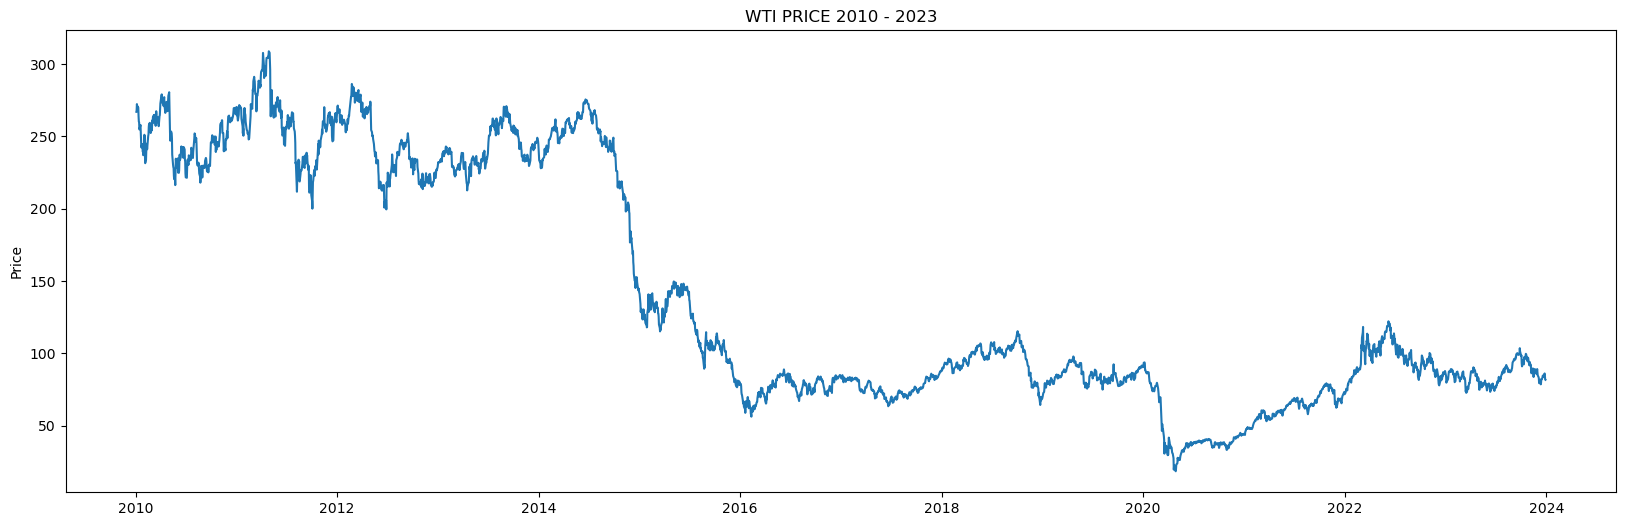

In [11]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.plot(data['Price'])
ax.set_ylabel("Price")
ax.set_title("WTI PRICE 2010 - 2023")
plt.show()

## Returns

- Return là lợi nhuận mà người dùng nhận được nếu so sánh giữa giá trị của cổ phiếu của ngày hôm nay và ngày hôm qua 

### Simple and Cumulative Returns 
- Simple return : là phần trăm lợi nhuận mà người nhận có thể nhận được so với ngày hôm qua. Công thức được tính : $$ Simple_Return = \frac {Today_Price - Yesterday_Price} {Yesterday_Price} $$
- Cumulative Returns (lợi nhuận tích lũy) : là phần trăm lợi nhuận nhận được sau một khoảng thời gian (ví dụ so sánh giá chênh lệch giữa 10 năm ). Công thức là : $$ Cumulative_Return = \frac {Now_Price - Prev_Price} {Prev_Price} $$ 

### Log Returns
- Log price : là giá của cổ phiếu tuy nhiên đã được scale xuống theo hàm log, nó giúp việc quan sát sự thay đổi của giá và tìm cơ hội đầu tư tốt hơn thông qua việc nhìn vào biểu đồ

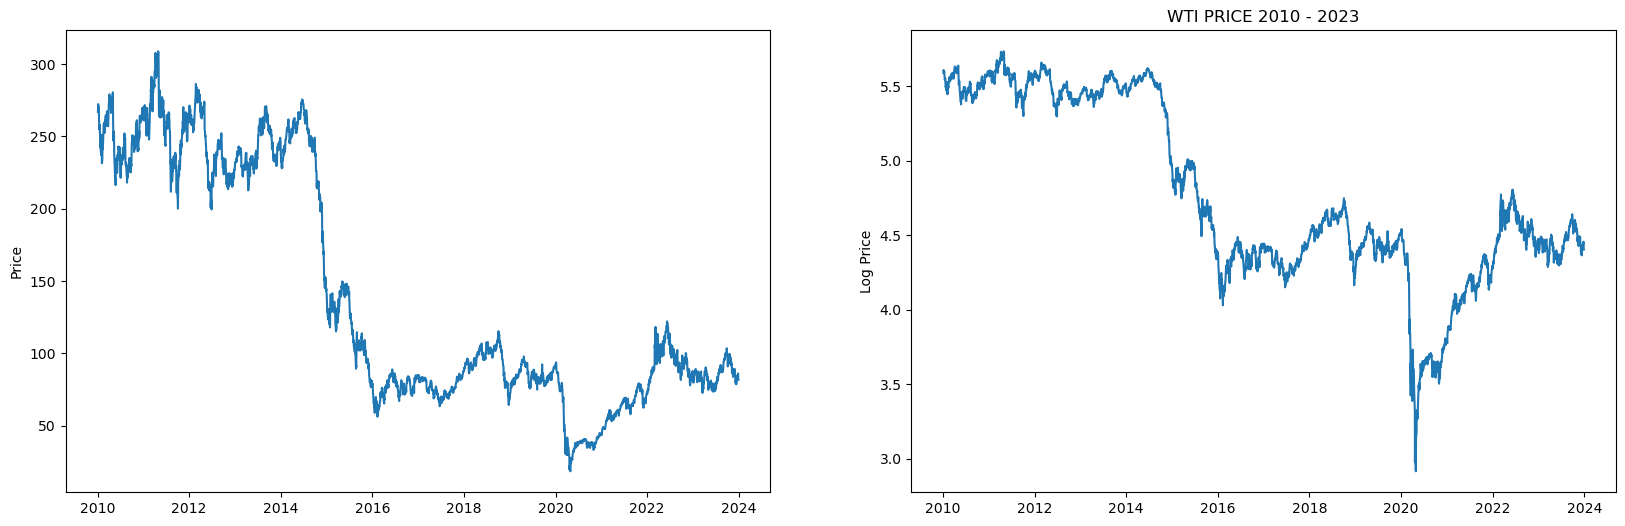

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ax[0].plot(data['Price'])
ax[0].set_ylabel("Price")
ax[1].plot(np.log(data['Price']))
ax[1].set_ylabel("Log Price")
plt.title("WTI PRICE 2010 - 2023")
plt.show()

=> Dựa vào biểu đồ log, ta có thể thấy sự thay đổi giá rõ ràng hơn, lựa chọn lệnh short trong khoảng 2020 hợp lý hơn rất nhiều so với việc nhìn vào biểu đồ giá
- Log return tính log của tỷ lệ thay đổi của giá, nó được tính theo công thức: $$ C_t = \ln \frac {V_{t + 1}} {V_{t}} $$ 


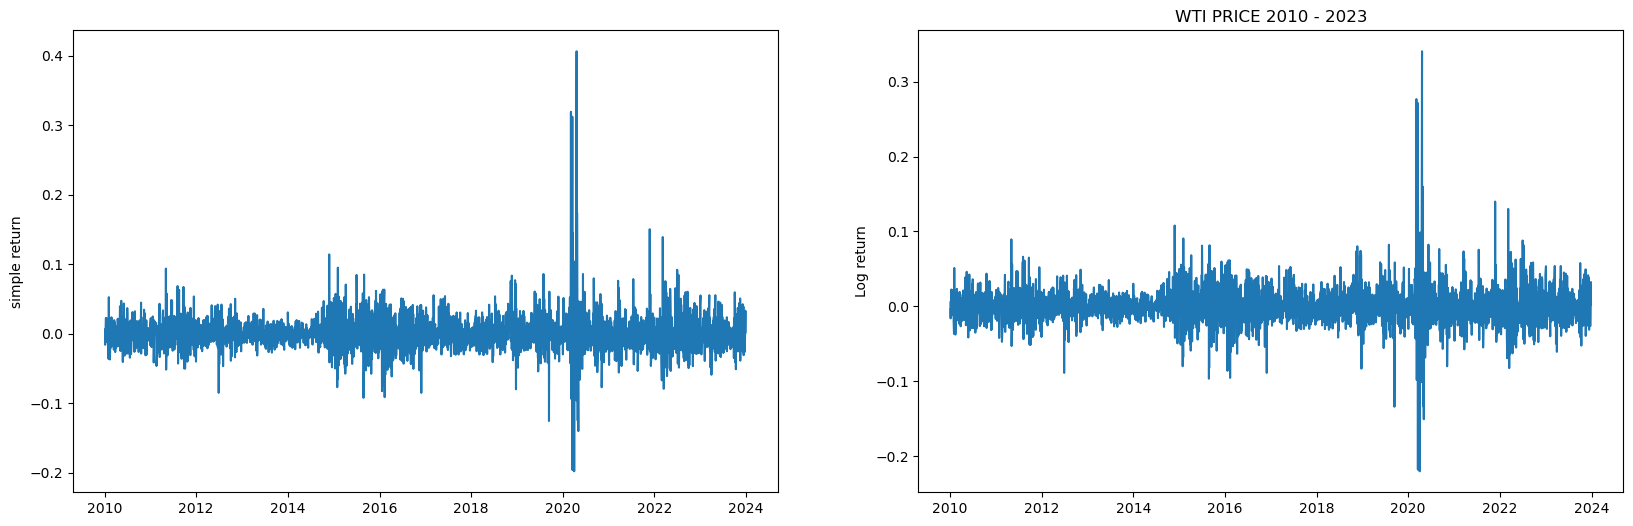

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ax[0].plot(data['Price'].pct_change())
ax[0].set_ylabel("simple return")
ax[1].plot(np.log(data['Price'] / data['Price'].shift(1)))
ax[1].set_ylabel("Log return")
plt.title("WTI PRICE 2010 - 2023")
plt.show()

? Khi nào ta nên sử dụng hai return 
1. Simple return : Người ta thường sử dụng để đánh giá lợi nhuận dựa theo giá tăng trong một thời gian ngắn
2. Log return : dùng để đánh giá lợi nhuận dựa theo giá trong một khoảng thời gian dài

# Component of Time Series 

- Thành phần của một Time Series: 
    1. Trend : dùng để miêu tả giá trị tăng hoặc giảm trong khoảng thời gian liên tục 
    2. Seasonality : sự lặp đi lặp lại của giá trị trong một khoảng thời gian cố định (thường là năm) ví dụ như trong khoảng 1 năm, doanh thu của công ty bán kem sẽ cao vào mùa hè 
    3. Unexpected events (irregularity): sự kiện xảy ra bất ngờ, không thể nắm bắt được, thay đổi một cách đột biến
    4. Cyclic : sự kiện thay đổi lặp đi lặp lại theo chiều hướng lên xong lại xuống và ngược lại

    ![Local Image](../Image/39815Components%20of%20Time%20Series%20Analysis.png)
- Như đề cập ở trên, một time series sẽ được chia thành 3 phần chính là trend, seasonality và residual (cyclic và unexpect event) 
- Người ta có thể tách dựa vào 2 cách thức chính :
    1. Dựa vào phép nhân: $$ y_{t} = T_{t} * S_{t} * R_{t} $$
    2. Dựa vào phép cộng: $$ y_{t} = T_{t} + S_{t} + R_{t} $$ 

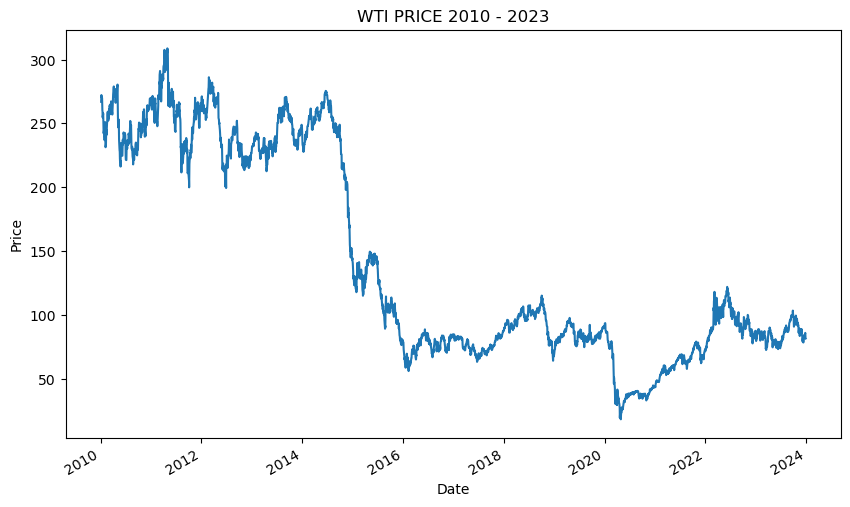

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (10, 6)

data['Price'].plot()
plt.ylabel("Price")
plt.title("WTI PRICE 2010 - 2023")
plt.show()

- Tách time series theo tổng : 

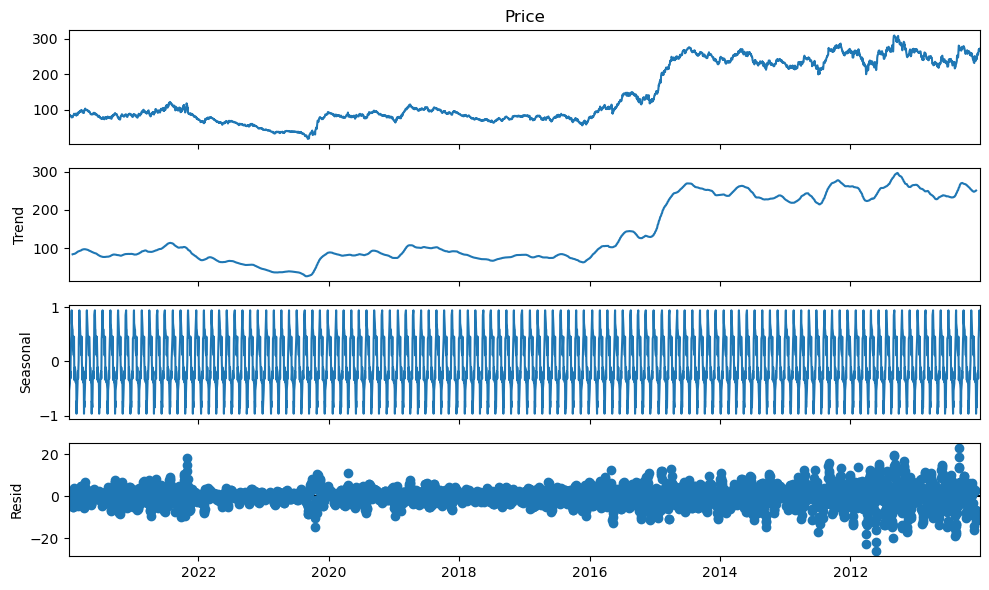

In [7]:
wti_decompose = seasonal_decompose(x = data['Price'], model="additive", period=30)
wti_decompose.plot()
plt.show()

- Tách time series theo tích: 

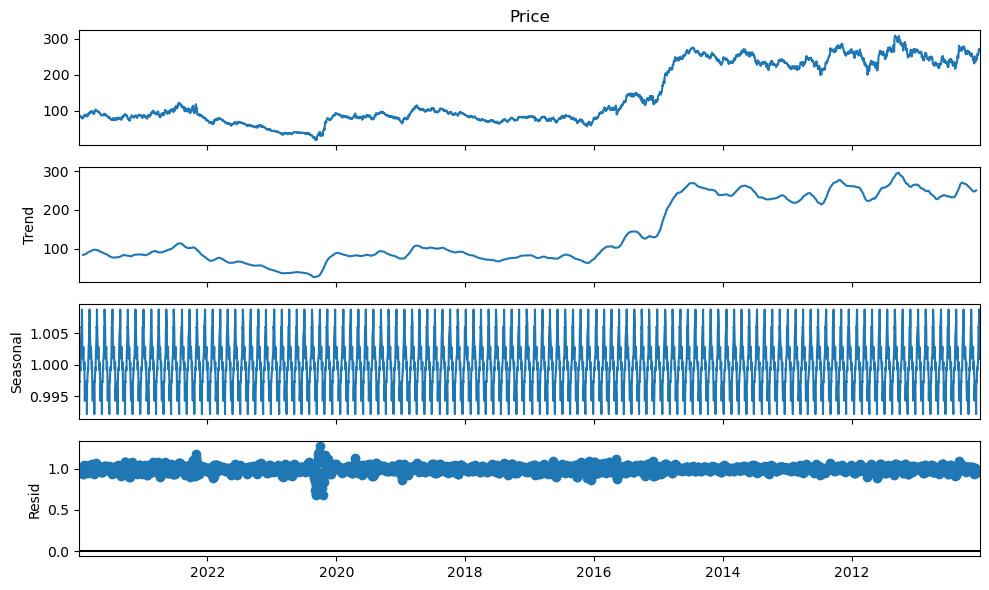

In [8]:
wti_decompose = seasonal_decompose(x = data['Price'], model="multiplicative", period=30)
wti_decompose.plot()
plt.show()

## Seasonality 

- Seasonality trong trading là một pattern thể hiện sự lặp đi lặp lại của giá trong một khoảng thời gian (một năm). Nó tương tự giống như dự báo thời tiết, hay mùa vụ trong sản xuất nó giải thích tại sao giá thường cao hoặc thấp hơn trong một số mùa, ngày trong năm
- Ví dụ như một công ty sản xuất điều hòa nhiệt độ, sẽ bán được nhiều hơn vào mùa hè => doanh thu cao => giá cổ phiếu cũng sẽ cao và mùa đông thì ngược lại



In [15]:
wti_monthly_return = data['Price'].pct_change().groupby([data['Price'].index.year, data['Price'].index.month]).mean()

In [16]:
wti_monthly_return_list = []

for i in range(len(wti_monthly_return)) : 
    wti_monthly_return_list.append({'month' : wti_monthly_return.index[i][1], 'monthly_return': wti_monthly_return.iloc[i]})

wti_monthly_return_list = pd.DataFrame(wti_monthly_return_list, columns=['month', 'monthly_return'])


In [17]:
wti_monthly_return_list.dropna(inplace=True)

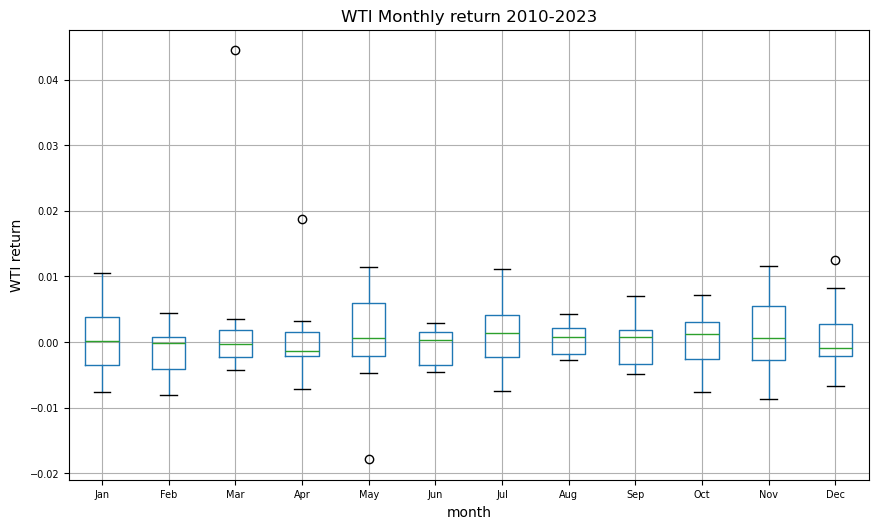

In [18]:
wti_monthly_return_list.boxplot(column='monthly_return', by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun',\
        'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('WTI return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("WTI Monthly return 2010-2023")

plt.suptitle("")
plt.show()

- Giá của cổ phiếu biến đổi theo tháng tương đối ổn định, vào tháng tư có có các điểm outlier lớn

## Trend 

- Trend là khi dữ liệu tăng hoặc giảm liên tục trong một khoảng thời gian dài 
- Trong ví dụ trên, ta có thể quan sát dữ liệu trong khoảng 2015 - 2016 đang giảm 

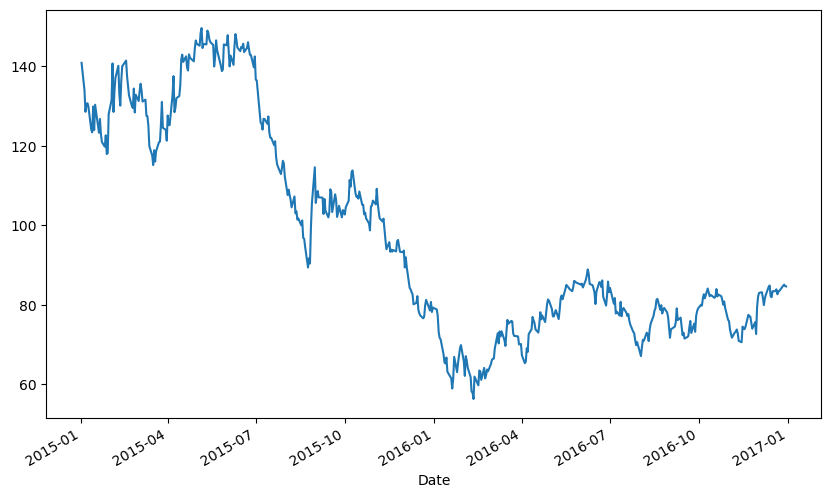

In [20]:
trend_data = data[data['Date'].dt.year.between(2015, 2016)]

trend_data['Price'].plot()
plt.show()

# Concept 

## Stationary vs Non-Stationary 



- Stationary time series (chuỗi thời gian đứng yên) là kiểu dữ liệu có mean và variance là cố định, không thay đổi theo thời gian (hoặc sự thay đổi là nhỏ)
- Ngược lại Non-stationary time series là kiểu dữ liệu có mean và variance thay đổi lớn, phụ thuộc vào thời gian. Ta có thể biến kiểu dữ liệu này thành Stationary bằng cách sử dụng các phương pháp như: detrending, differencing

![Local Image](../Image/99388Stationary%20Vs%20Non-Stationary.png)

- Trong các bài toán dự báo dựa trên time series, người ta thường mong muốn time series là "stationary" (đứng yên). Do Autregressive forcasting model thường là các mô hình hồi quy tuyến tính với một số lag được coi như là biến X (predictor), mà một mô hình linear regression hoạt động tốt nhất với dữ liệu X là các biến không tương quan với nhau (gần như độc lập) và các dữ liệu Stationary giải quyết vấn đề đó

### Nhận biết một chuỗi có phải là đứng yên (stationary) hay không ?
- Để kiểm tra xem time series có đứng yên hay không (stationarity), người ta sử dụng các kiểm định thống kê
- Có 2 kiểm định thống kê thường được sử dụng đó là ADF và KPSS. Chúng kiểm tra xem trong time series có unit roots (trend ngẫu nhiên trong time series)
- ADF có null hypothesis là tồn tại unit root trong dữ liệu còn KPSS thì ngược lại  

In [23]:
from statsmodels.tsa.stattools import adfuller, kpss

def output(test_output, test_type): 
    decision = "Non-Stationary"
    if test_type == 'adf' and test_output[1] < 0.05: decision = "Sationary"
    elif test_type == 'kpss' and test_output[1] >= 0.05: decision = "Sationary"

    return pd.Series(data={'Test Statistic': test_output[0], 'p-value': test_output[1], 'Numbers of lags': test_output[2], 'Decision':decision}, name=test_type)



def test_stationality(data): 
    adfoutput = adfuller(data)
    kpssoutput = kpss(data)

    return pd.concat([output(adfoutput, 'adf'), output(kpssoutput, 'kpss')], axis=1)


test_stationality(data['Price'])


C:\Users\Asus\AppData\Local\Temp\ipykernel_11692\2969237332.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssoutput = kpss(data)


,adf,kpss
Test Statistic,-0.56818,7.211621
p-value,0.878011,0.01
Numbers of lags,1,38
Decision,Non-Stationary,Non-Stationary


### Một số method tạo ra time series stationary  

### First-order differencing 
- Được tính thông qua việc lấy hiệu của thời điểm quan sát hiện tại (t) với thời điểm trước đó (t - 1 )

In [24]:
first_order_diff = data['Price'].diff().dropna()
test_stationality(first_order_diff)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11692\2969237332.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssoutput = kpss(data)


,adf,kpss
Test Statistic,-61.149979,0.117889
p-value,0.0,0.1
Numbers of lags,0,3
Decision,Sationary,Sationary


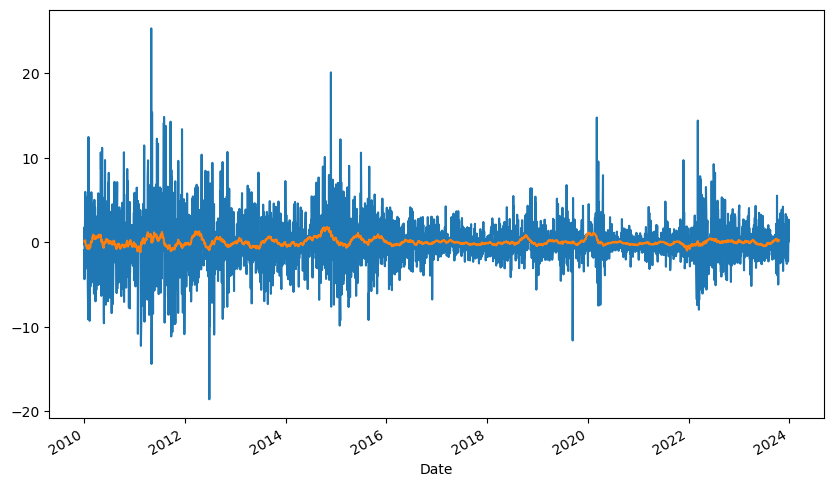

In [25]:
first_order_diff.plot()
first_order_diff.rolling(52).mean().plot()
plt.show()

### Subtracting moving average
- Tính hiệu của dữ liệu hiện tại và moving average với window = 52

In [26]:
rolling = data['Price'].rolling(52).mean()
subtract_rolling_mean = data['Price'] -rolling
test_stationality(subtract_rolling_mean.dropna())

C:\Users\Asus\AppData\Local\Temp\ipykernel_11692\2969237332.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssoutput = kpss(data)


,adf,kpss
Test Statistic,-7.155498,0.171758
p-value,0.0,0.1
Numbers of lags,0,37
Decision,Sationary,Sationary


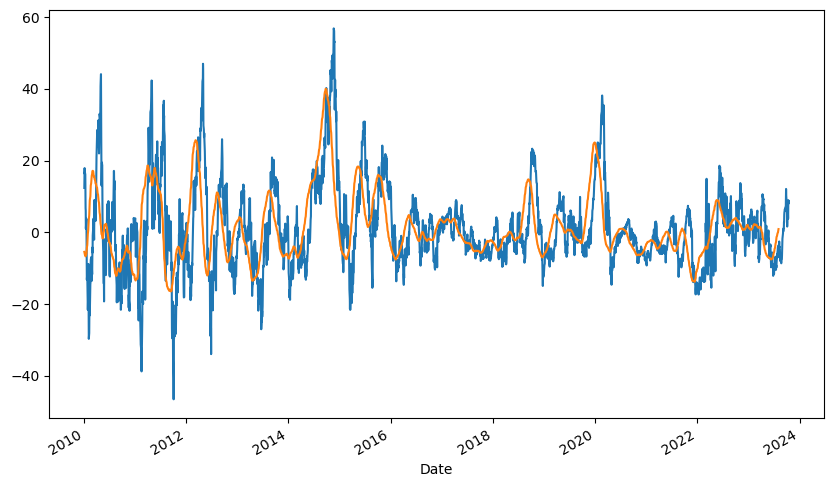

In [27]:
subtract_rolling_mean.dropna().plot()
subtract_rolling_mean.rolling(52).mean().plot()
plt.show()

### Log transformation 
- Lấy log của time series

In [28]:
log_trans = np.log(data['Price'])

test_stationality(log_trans)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11692\2969237332.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssoutput = kpss(data)


,adf,kpss
Test Statistic,-1.019132,6.773971
p-value,0.746223,0.01
Numbers of lags,23,38
Decision,Non-Stationary,Non-Stationary


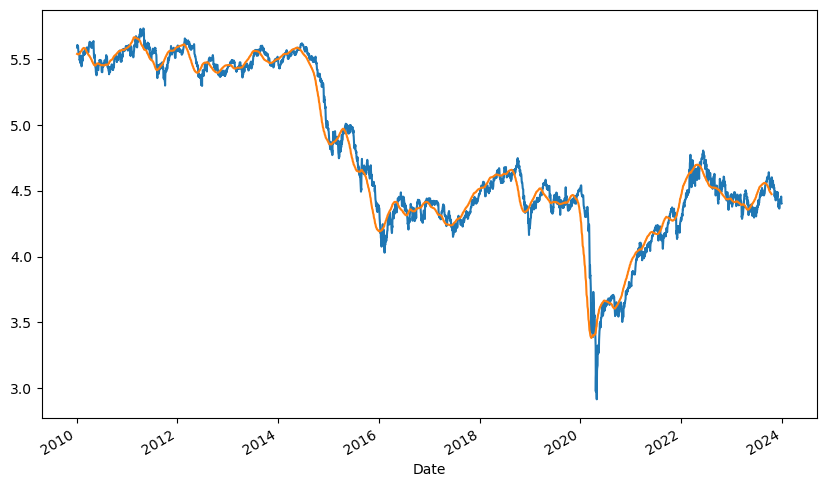

In [29]:
log_trans.plot()
log_trans.rolling(52).mean().plot()
plt.show()

### Subtracting moving average
- Một cách để chuyển dữ liệu từ không đứng yên thành kiểu dữ liệu đứng yên (stationary) đó là sử dụng phương pháp Rolling statistic - tính MA với một window_size được định nghĩa trước
- Về bản chất, rolling statistic là tính các giá trị thống kê mô tả dựa trên dữ liệu trong một khoảng thời gian nào đó. Ta có thể đánh giá sự thay đổi giữa mean và variance của dữ liệu để có thể đánh giá xem nó có phải stationary hay không 

In [30]:
def rolling_statistic(data: pd.Series, window_size: int, title_text: str, y_text: str):
    plt.figure(figsize=(10, 6))                                                                             
    data.plot(color='red', lw=0.5, label="Origin Price")
    data.rolling(window_size).mean().plot(color='green', lw=0.5, label="Mean" )
    data.rolling(window_size).std().plot(color="black", lw=0.5, label="Std price")
    plt.legend()
    plt.title(title_text)
    plt.ylabel(y_text)
    plt.show()


- Dễ thấy trong daily price, đường mean và std có sự thay đổi lớn, do đó chuỗi này không phải là một chuỗi cố định, điều tương tự cũng xảy ra với khoảng thời gian tháng


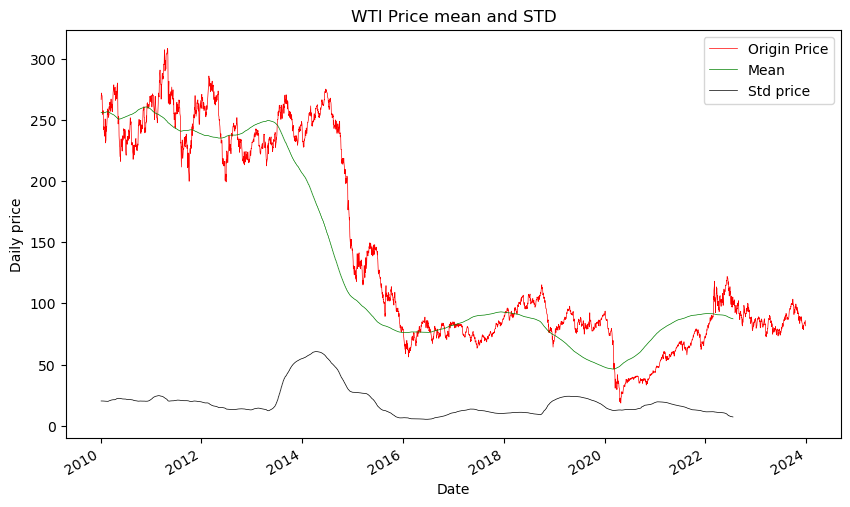

In [31]:
rolling_statistic(data['Price'], 365, "WTI Price mean and STD", "Daily price")

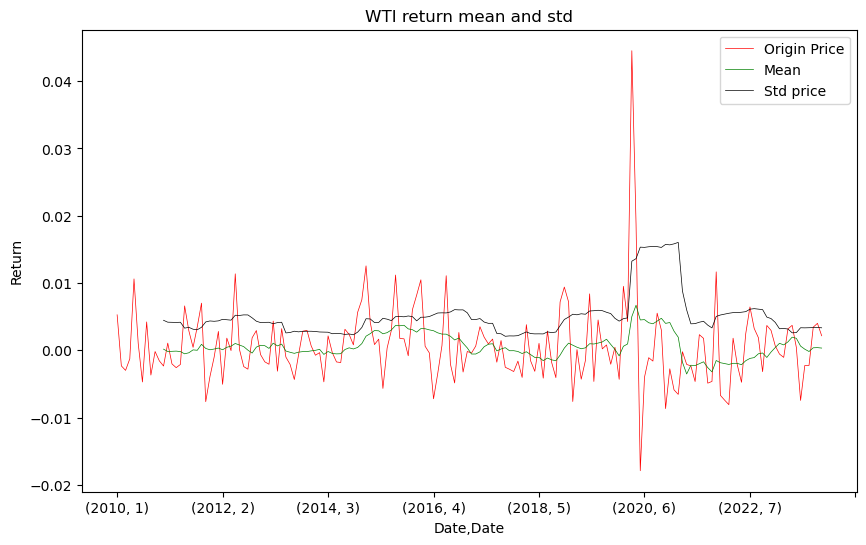

In [22]:
rolling_statistic(wti_monthly_return, 12, "WTI return mean and std", "Return")

=> Có thể thấy, hai time series (daily price và monthly_return) đều chứa trend và seasonality do đó chúng không được gọi là một stationality time series 
- Ta sẽ sử dụng phương pháp subtracting ma để xem đường giá và các thống kê, kết quả cho thấy, các giá trị không có thay đổi quá lớn

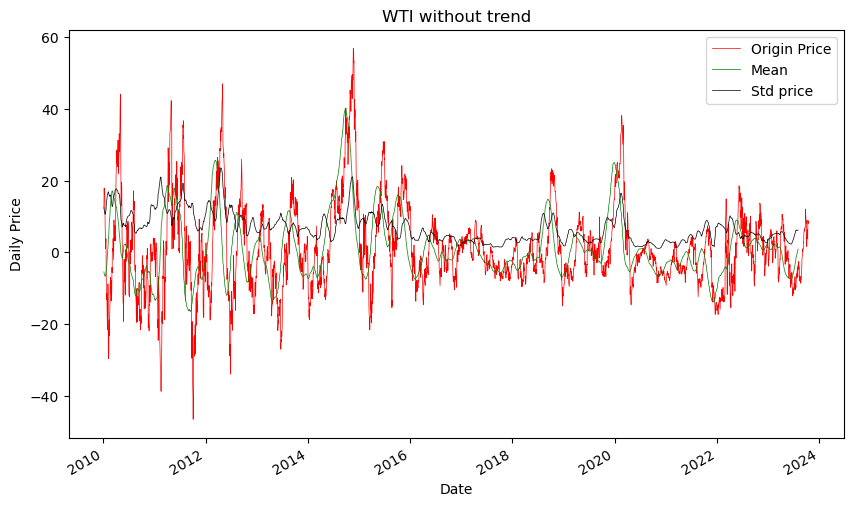

In [32]:
rolling_statistic(data['Price'] - data['Price'].rolling(52).mean(),52,  "WTI without trend", "Daily Price")

In [33]:
subtracting_ma = data['Price'] - data['Price'].rolling(52).mean()

subtracting_ma.dropna(inplace=True)
test_stationality(subtracting_ma)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11692\2969237332.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssoutput = kpss(data)


,adf,kpss
Test Statistic,-7.155498,0.171758
p-value,0.0,0.1
Numbers of lags,0,37
Decision,Sationary,Sationary


=> Phép kiểm thử cũng đưa ra kết quả có tính chính xác cao 

## Linear Regression Analysis

## Linear Correlation Analysis

# Reference 
- [Time Series Analysis and Forecasting | Data-Driven Insights (Updated 2024)](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/)
- https://stats.stackexchange.com/questions/65464/when-would-time-series-not-work
- https://www.allquant.co/post/magic-of-log-returns-concept-part-1